In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

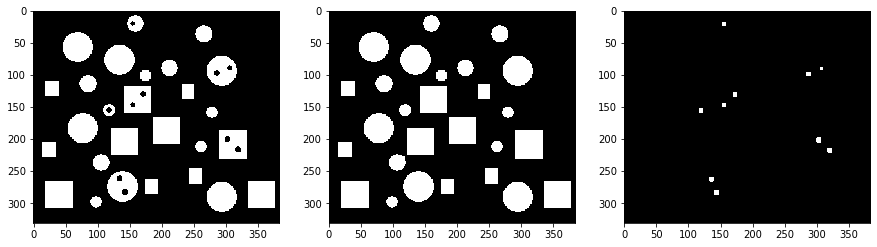

In [2]:
im = cv2.imread("../input_data/objects.png",0)
im = (im>127).astype(np.uint8)
kernel = np.ones((7,9))
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
im2 = cv2.dilate(im,kernel,iterations=1)
solids = cv2.erode(im2,kernel,iterations=1)
holes = solids - im
holes = cv2.erode(holes,np.ones((6,6)),iterations=1)
holes = cv2.dilate(holes,np.ones((6,6)),iterations=1)
fig = plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(im,cmap='gray')
plt.subplot(132)
plt.imshow(solids,cmap='gray')
plt.subplot(133)
plt.imshow(holes,cmap='gray')
plt.show()

In [3]:
def fourConnComp(i,j,im,final,visited):
    if(i<0 or i>=im.shape[0] or j<0 or j>=im.shape[1] or visited[i,j] == 1):
        return 0
    
    visited[i,j] = 1
    if(im[i,j] == 1):
        final[i,j] = 1
        fourConnComp(i+1,j,im,final,visited)
        fourConnComp(i-1,j,im,final,visited)        
        fourConnComp(i,j+1,im,final,visited)        
        fourConnComp(i,j-1,im,final,visited)  
    
    return 0
    

In [4]:
def count_comp(temp,im2):
    global c
    h,w = temp.shape
    final = np.zeros((temp.shape),dtype=np.uint16)
    visited = np.zeros((temp.shape))
    
    c = 0
    for i in range(h):
        for j in range(w):
            if(temp[i,j] == 1 and visited[i,j] == 0):
                fourConnComp(i,j,im2,final,visited)
                c = c+1
    
#     print("Objects with holes = "+str(c))
    return final

Objects with holes =  6


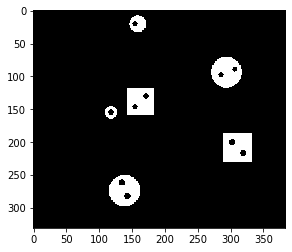

In [5]:
final = count_comp(holes,solids)
# plt.imshow(final,cmap='gray')
print("Objects with holes = ",c)
final_holes = np.logical_and(final,im).astype(np.uint8)
plt.imshow(final_holes,cmap='gray')

In [6]:
def filtfunc(i,f):
    k = f.shape[0] // 2
    padded_im = np.pad(i,((k,k),(k,k)),'constant')
    final = np.zeros(im.shape)
#     print(f.size)
    for i in range(k,final.shape[0]+k):
        for j in range(k,final.shape[1]+k):
            if np.sum(np.equal(padded_im[i-k:i+k+1,j-k:j+k+1], f)) == f.size:
                final[i-k,j-k] = 1
    return final
        

Squares =  11


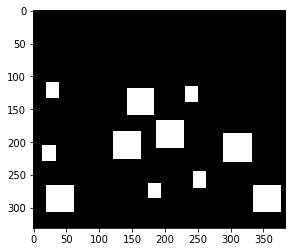

In [7]:
# se = np.array([[1,1,0],[1,1,0],[0,0,0]])
# se = np.array([[1,1],[1,1]])
se = np.array([[0,0,0],[0,1,1],[0,1,1]])

squares = filtfunc(solids,se)
# squares = cv2.morphologyEx(solids,cv2.MORPH_HITMISS,se)

final_squares = count_comp(squares,solids)
print("Squares = ",c)
plt.imshow(final_squares,cmap='gray')

Squares with holes =  2


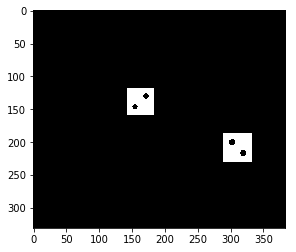

In [156]:
hole_square = np.logical_and(final_squares,final_holes)
count_comp(hole_square,hole_square)
print("Squares with holes = ",c)
plt.imshow(hole_square,cmap='gray')


Circles with no holes =  12


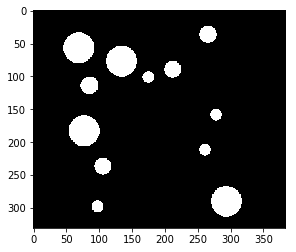

In [157]:
no_holes = im - final_holes
# plt.imshow(no_holes,cmap='gray')

# se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
se = np.array([[1,1,0],[1,1,0],[1,0,0]])
# se = np.array([[0,1,1],[0,1,1],[0,0,1]])
circles = filtfunc(no_holes ,se)
final_circles = count_comp(circles,no_holes)
print("Circles with no holes = ",c)
plt.imshow(final_circles,cmap='gray')